Dataset Information
Additional Information

Data set has no missing values.
Values are in kW of each 15 min. To convert values in kWh values must be divided by 4.
Each column represent one client. Some clients were created after 2011. In these cases consumption were considered zero.
All time labels report to Portuguese hour. However all days present 96 measures (24*4). Every year in March time change day (which has only 23 hours) the values between 1:00 am and 2:00 am are zero for all points. Every year in October time change day (which has 25 hours) the values between 1:00 am and 2:00 am aggregate the consumption of two hours.

In [32]:
import pandas as pd

In [33]:
#load the data set
data = pd.read_csv("DataElectricity.txt", sep=';')
data.head()

/tmp/ipykernel_37792/178391387.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("DataElectricity.txt", sep=';')


,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
4,2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


In [34]:
#Rename the columns Unnamed 0 to Date 
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [35]:
#Transform Data to datetime 
data['Date'] = pd.to_datetime(data['Date'])


#Remove NA date columns
remove_not_date = data[data['Date'].isna()]
if not remove_not_date.empty:
    print("Invalide date:\n", remove_not_date)
    data = data.dropna(subset=['Date'])
# covert to data time type
data['Date'] = pd.to_datetime(data['Date'])
# Create a new colomn Year, Month, day, hour, minute from V1
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.strftime('%B')
data['Day'] = data['Date'].dt.strftime('%A')
data['Hour'] = data['Date'].dt.strftime('%H')
data['Minute'] = data['Date'].dt.strftime('%M')  
data.sample(10)

,Date,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_366,MT_367,MT_368,MT_369,MT_370,Year,Month,Day,Hour,Minute
129425,2014-09-10 04:30:00,"17,7664974619289","24,8933143669986","1,73761946133797","95,5284552845528","32,9268292682927","110,119047619048","3,39174674957603","205,387205387205","54,1958041958042",...,"5,26623756582797","572,43195785777","73,4557595993322","771,994134897361","24864,8648648649",2014,September,Wednesday,04,30
109708,2014-02-16 19:15:00,"1,26903553299492","32,0056899004267","2,60642919200695","223,577235772358","86,5853658536585","291,666666666667","9,04465799886942","329,96632996633","89,1608391608392",...,"4,09596255119953","487,269534679543","51,7529215358932","652,492668621701","8324,32432432433",2014,February,Sunday,19,15
36180,2012-01-12 21:15:00,"6,34517766497462","30,5832147937411","3,47523892267593","215,447154471545","90,2439024390244","419,642857142857","6,78349349915206","393,939393939394","87,4125874125874",...,"25,7460503218256","654,96049165935","195,325542570952","885,630498533724",0,2012,January,Thursday,21,15
92078,2013-08-17 03:45:00,"16,497461928934","28,4495021337127","1,73761946133797","97,5609756097561","56,0975609756098","113,095238095238","32,7868852459016","218,855218855219","34,965034965035",...,"8,77706260971328","791,044776119403","110,183639398998","890,029325513196","21405,4054054054",2013,August,Saturday,03,45
8657,2011-04-01 04:30:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2011,April,Friday,04,30
39428,2012-02-15 17:15:00,"17,7664974619289","27,7382645803698","79,9304952215465","103,658536585366","54,8780487804878","232,142857142857","1,13058224985868","239,057239057239","57,6923076923077",...,"15,2135751901697","734,855136084284","245,409015025042","901,026392961877",0,2012,February,Wednesday,17,15
127993,2014-08-26 06:30:00,"16,497461928934","32,7169274537696","1,73761946133797","65,0406504065041","39,0243902439024","95,2380952380952","8,47936687394008","181,818181818182","55,9440559440559",...,"8,77706260971328","598,770851624232","76,7946577629382","862,903225806452","19405,4054054054",2014,August,Tuesday,06,30
12026,2011-05-06 06:45:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2011,May,Friday,06,45
46164,2012-04-25 21:15:00,"5,0761421319797","25,6045519203414","3,47523892267593","152,439024390244","70,7317073170732","270,833333333333","3,95703787450537","282,828282828283","75,1748251748252",...,"14,6284376828555","589,113257243196","111,853088480801","821,847507331378",0,2012,April,Wednesday,21,15
84044,2013-05-25 11:15:00,0,"41,2517780938834","1,73761946133797","89,4308943089431","29,2682926829268","205,357142857143","5,08762012436405","265,993265993266","24,4755244755245",...,"4,09596255119953","563,652326602283","31,7195325542571","806,451612903226","19502,7027027027",2013,May,Saturday,11,15


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# get V2 to V371
convert_num = data.columns[1:-5]  
# Replace commas with point
for col in convert_num:
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)
# Convert kW to kWh
data[convert_num] = data[convert_num] / 4
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Columns: 376 entries, Date to Minute
dtypes: datetime64[ns](1), float64(370), int32(1), object(4)
memory usage: 401.8+ MB
None
                                Date         MT_001         MT_002  \
count                         140256  140256.000000  140256.000000   
mean   2012-12-31 12:07:29.999999488       0.992696       5.192120   
min              2011-01-01 00:15:00       0.000000       0.000000   
25%              2012-01-01 06:11:15       0.000000       0.711238   
50%              2012-12-31 12:07:30       0.317259       6.223329   
75%              2013-12-31 18:03:45       0.634518       7.467994   
max              2015-01-01 00:00:00      12.055838      28.805121   
std                              NaN       1.495991       3.318104   

              MT_003         MT_004         MT_005         MT_006  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean        0.729577      

In [37]:
data.head(20)

,Date,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_366,MT_367,MT_368,MT_369,MT_370,Year,Month,Day,Hour,Minute
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,00,15
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,00,30
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,00,45
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,01,00
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,01,15
5,2011-01-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,01,30
6,2011-01-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,01,45
7,2011-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,02,00
8,2011-01-01 02:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,02,15
9,2011-01-01 02:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2011,January,Saturday,02,30


In [38]:
#data[data.duplicated()]

In [39]:
data.isnull().sum()

Date      0
MT_001    0
MT_002    0
MT_003    0
MT_004    0
         ..
Year      0
Month     0
Day       0
Hour      0
Minute    0
Length: 376, dtype: int64

In [40]:
# Remove the year 2011 in the data
data = data[(data['Date'] >= '2012-01-01') & (data['Date'] <= '2014-12-31')]
data.head()

,Date,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_366,MT_367,MT_368,MT_369,MT_370,Year,Month,Day,Hour,Minute
35039,2012-01-01 00:00:00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,2012,January,Sunday,00,00
35040,2012-01-01 00:15:00,0.951777,5.6899,19.331017,34.044715,17.682927,87.797619,2.402487,69.86532,18.793706,...,3.218256,126.207199,15.859766,190.432551,0.0,2012,January,Sunday,00,15
35041,2012-01-01 00:30:00,1.269036,5.6899,19.331017,34.044715,18.292683,88.541667,2.261164,69.86532,18.356643,...,3.364541,131.255487,15.025042,175.586510,0.0,2012,January,Sunday,00,30
35042,2012-01-01 00:45:00,0.951777,5.6899,19.331017,35.060976,17.378049,87.053571,2.119842,69.86532,18.793706,...,2.633119,131.694469,14.190317,174.120235,0.0,2012,January,Sunday,00,45
35043,2012-01-01 01:00:00,0.951777,5.6899,19.331017,35.060976,18.902439,84.821429,1.837196,69.86532,17.045455,...,3.657109,134.986831,15.859766,173.387097,0.0,2012,January,Sunday,01,00


## Understanding Electricity Consumption

/tmp/ipykernel_37792/3631404534.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['datetime'] = pd.to_datetime(data['Date'])


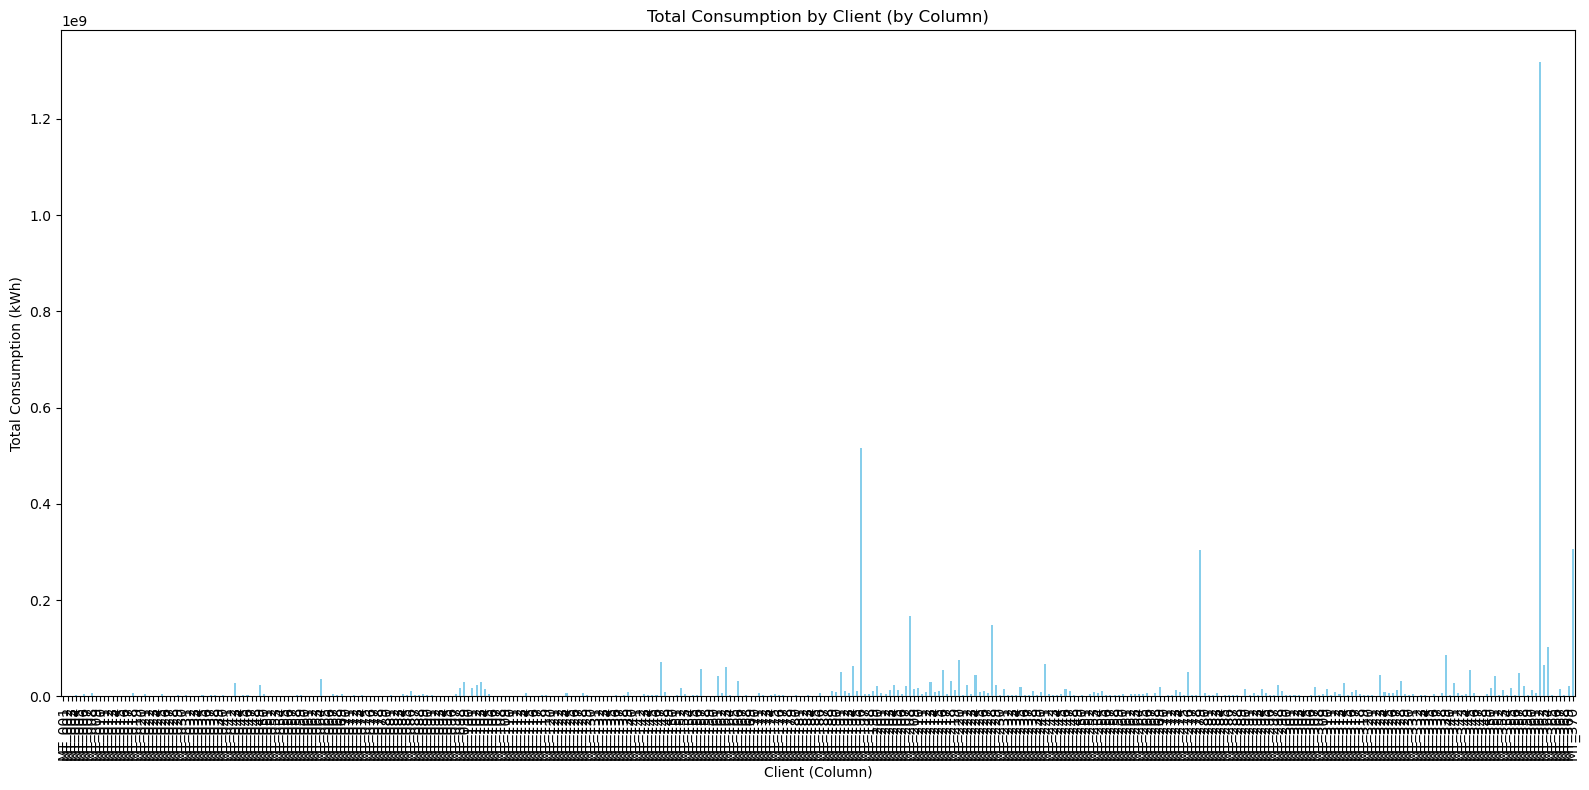

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

data['datetime'] = pd.to_datetime(data['Date'])
data.set_index('datetime', inplace=True)

# Get V2 to V371
consumption_columns = data.loc[:, 'MT_001':'MT_370']

# Compute the total consumption for each column
total_consumption_per_column = consumption_columns.sum()

# Plot the total consumption by client (by column)
plt.figure(figsize=(16, 8))
total_consumption_per_column.plot(kind='bar', color='skyblue')
plt.title('Total Consumption by Client (by Column)')
plt.xlabel('Client (Column)')
plt.ylabel('Total Consumption (kWh)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipykernel_37792/1281780555.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Total_Consumption'] = consumption_columns.sum(axis=1)


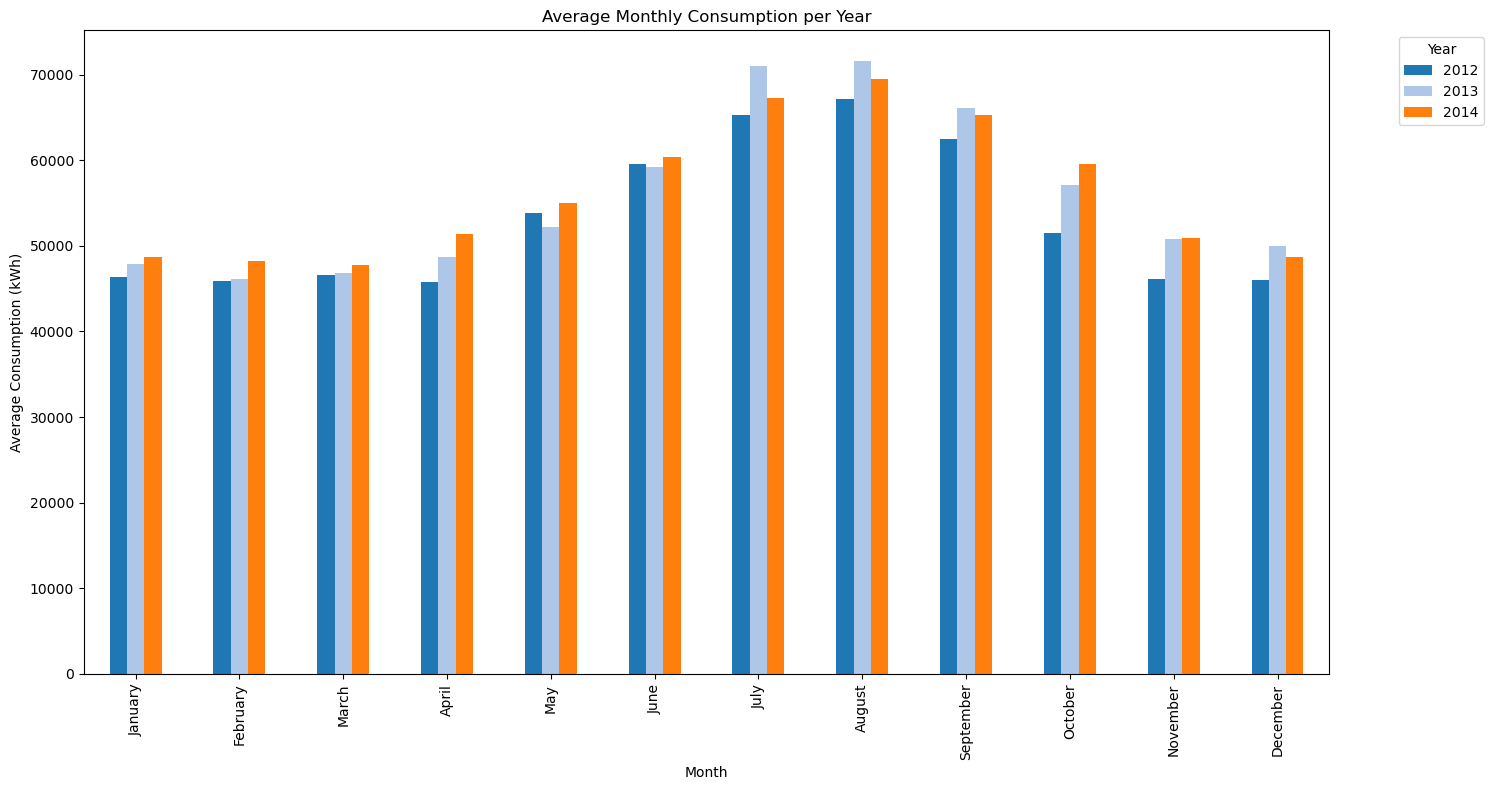

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the consumption for each row (for each 15min)
consumption_columns = data.loc[:, 'MT_001':'MT_370']
data['Total_Consumption'] = consumption_columns.sum(axis=1)

# Group by year and month and compute the average
monthly_consumption = data.groupby([data.index.year, data.index.month])['Total_Consumption'].mean()
monthly_consumption.index.names = ['Year', 'Month']

# Create a pivot table to organize the data for plotting
pivot_table = monthly_consumption.unstack(level=0)
pivot_table.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the average consumption per month for each year
pivot_table.plot(kind='bar', figsize=(15, 8), color=plt.cm.tab20.colors)
plt.title('Average Monthly Consumption per Year')
plt.xlabel('Month')
plt.ylabel('Average Consumption (kWh)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_37792/2272739173.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['datetime'] = pd.to_datetime(data['Date'])
/tmp/ipykernel_37792/2272739173.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Day_of_Week'] = data.index.dayofweek


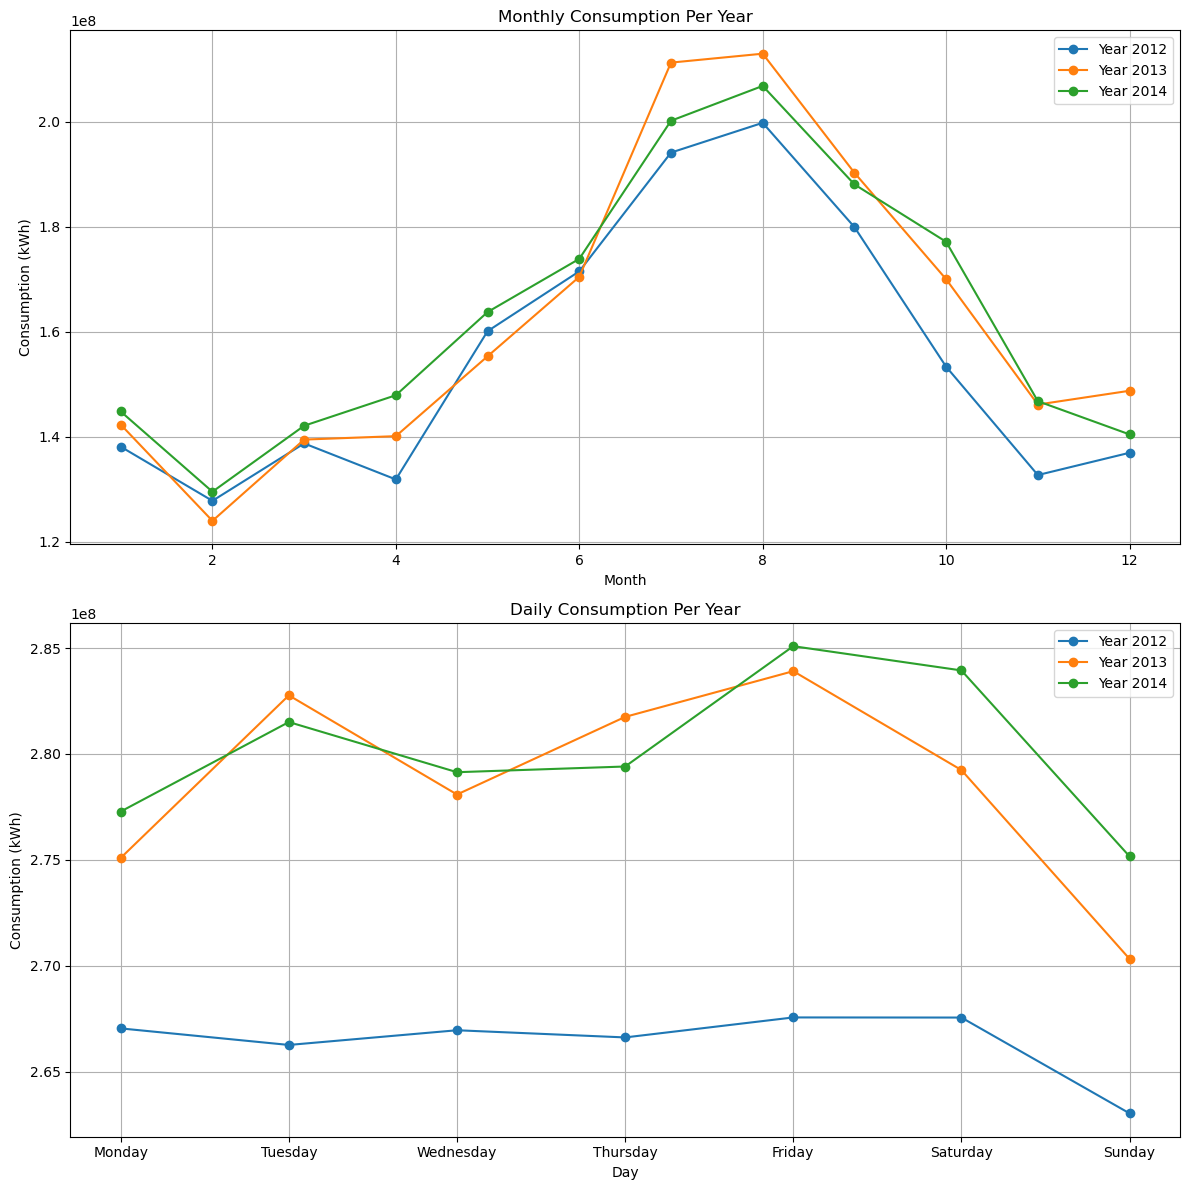

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' column is in datetime format and set it as the index
data['datetime'] = pd.to_datetime(data['Date'])
data.set_index('datetime', inplace=True)

# Compute the consumption for each row (for each 15 minutes)
consumption_columns = data.loc[:, 'MT_001':'MT_370']
data['Total_Consumption'] = consumption_columns.sum(axis=1)

# Compute the consumption per month and per day for each year
monthly_consumption = data.groupby([data.index.year, data.index.month])['Total_Consumption'].sum()

# Add a column for the day of the week
data['Day_of_Week'] = data.index.dayofweek
daily_consumption = data.groupby([data.index.year, data['Day_of_Week']])['Total_Consumption'].sum()

# Day names for the x-axis
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create subplots for monthly and daily consumption
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot monthly consumption
for year in monthly_consumption.index.levels[0]:
    monthly_data = monthly_consumption.loc[year]
    axs[0].plot(monthly_data.index, monthly_data.values, label=f'Year {year}', marker='o')

axs[0].set_title('Monthly Consumption Per Year')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Consumption (kWh)')
axs[0].legend()
axs[0].grid(True)

# Plot daily consumption
for year in daily_consumption.index.levels[0]:
    daily_data = daily_consumption.loc[year]
    axs[1].plot(daily_data.index, daily_data.values, label=f'Year {year}', marker='o')

axs[1].set_title('Daily Consumption Per Year')
axs[1].set_xlabel('Day')
axs[1].set_ylabel('Consumption (kWh)')
axs[1].set_xticks(range(len(day_names)))
axs[1].set_xticklabels(day_names)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


/tmp/ipykernel_37792/3538162936.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Season'] = data['Month'].apply(get_season)


<Figure size 1200x600 with 0 Axes>

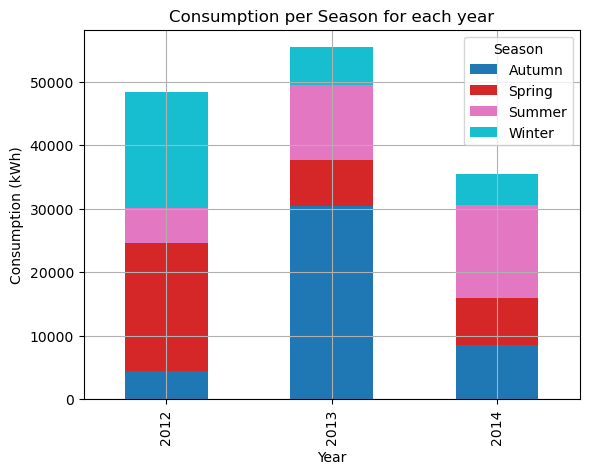

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Season'] = data['Month'].apply(get_season)

data['Year'] = pd.to_datetime(data['Date']).dt.year

seasonal_consumption = data.groupby(['Year', 'Season'])['MT_001'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

seasonal_consumption.plot(kind='bar', stacked=True, colormap='tab10')

plt.title('Consumption per Season for each year')
plt.xlabel('Year')
plt.ylabel('Consumption (kWh)')
plt.legend(title='Season')
plt.grid(True)

plt.show()

/tmp/ipykernel_37792/525971304.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['datetime'] = pd.to_datetime(data['Date'])


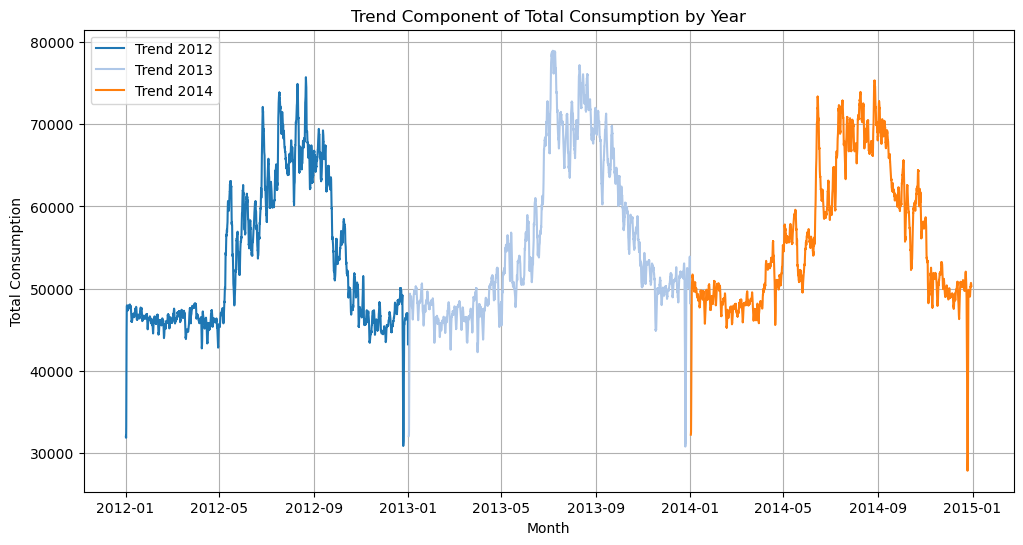

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is your DataFrame and it's already loaded
data['datetime'] = pd.to_datetime(data['Date'])
data.set_index('datetime', inplace=True)

# Get V2 to V371
consumption_columns = data.loc[:, 'MT_001':'MT_370']

# Compute the consumption for each row (for each 15min)
data['Total_Consumption'] = consumption_columns.sum(axis=1)

# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Initialize the plot
plt.figure(figsize=(12, 6))

# Loop through each year and plot the trend component
years = data.index.year.unique()
colors = plt.cm.tab20.colors  # Use a colormap with enough unique colors

for i, year in enumerate(years):
    yearly_data = data[data.index.year == year]
    result = seasonal_decompose(yearly_data['Total_Consumption'], model='additive', period=96)
    plt.plot(result.trend, label=f'Trend {year}', color=colors[i % len(colors)])

# Customize the plot
plt.title('Trend Component of Total Consumption by Year')
plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.legend()
plt.grid(True)
plt.show()



In [46]:
# Créer une colonne de date simplifiée (année et mois)
data['Year-Month'] = data['Date'].dt.to_period('M')

# Définir la colonne Year-Month comme index
data.set_index('Year-Month', inplace=True)
data.head(10)

/tmp/ipykernel_37792/3415801846.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Year-Month'] = data['Date'].dt.to_period('M')


,Date,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_369,MT_370,Year,Month,Day,Hour,Minute,Total_Consumption,Day_of_Week,Season
Year-Month,,,,,,,,,,,,,,,,,,,,,
2012-01,2012-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2012,1,Sunday,00,00,15168.058505,6,Winter
2012-01,2012-01-01 00:15:00,0.951777,5.689900,19.331017,34.044715,17.682927,87.797619,2.402487,69.865320,18.793706,...,190.432551,0.0,2012,1,Sunday,00,15,30092.858127,6,Winter
2012-01,2012-01-01 00:30:00,1.269036,5.689900,19.331017,34.044715,18.292683,88.541667,2.261164,69.865320,18.356643,...,175.586510,0.0,2012,1,Sunday,00,30,29609.873273,6,Winter
2012-01,2012-01-01 00:45:00,0.951777,5.689900,19.331017,35.060976,17.378049,87.053571,2.119842,69.865320,18.793706,...,174.120235,0.0,2012,1,Sunday,00,45,29359.703917,6,Winter
2012-01,2012-01-01 01:00:00,0.951777,5.689900,19.331017,35.060976,18.902439,84.821429,1.837196,69.865320,17.045455,...,173.387097,0.0,2012,1,Sunday,01,00,28603.230645,6,Winter
2012-01,2012-01-01 01:15:00,1.269036,5.512091,19.331017,36.585366,18.292683,85.565476,1.695873,66.498316,17.482517,...,180.901760,0.0,2012,1,Sunday,01,15,28131.246540,6,Winter
2012-01,2012-01-01 01:30:00,0.951777,5.689900,19.331017,33.536585,18.292683,84.077381,1.554551,68.181818,16.608392,...,178.335777,0.0,2012,1,Sunday,01,30,27872.852761,6,Winter
2012-01,2012-01-01 01:45:00,0.951777,5.689900,19.331017,33.028455,16.768293,85.565476,1.695873,70.707071,16.171329,...,175.586510,0.0,2012,1,Sunday,01,45,27943.038922,6,Winter
2012-01,2012-01-01 02:00:00,1.586294,6.223329,19.331017,34.044715,16.768293,84.077381,1.978519,70.707071,17.045455,...,171.004399,0.0,2012,1,Sunday,02,00,27873.826712,6,Winter


In [47]:
#data = data.to_timestamp()
weekly_avg = data.resample('W').mean(numeric_only=True)
weekly_avg['Year'] = weekly_avg.index.Year
#weekly_avg

IncompatibleFrequency: Frequency <MonthEnd> cannot be resampled to <Week: weekday=6>, as they are not sub or super periods

In [ ]:
'''import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

data['datetime'] = pd.to_datetime(data['Date'])
data.set_index('datetime', inplace=True)


# Define and fit the SARIMA model
model = SARIMAX(data['Total_Consumption'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 96))
sarima_fit = model.fit(disp=False)

# Make forecasts for the next 12 months
forecast = sarima_fit.get_forecast(steps=12*96)  # Forecasting 12 months ahead with 15-minute intervals
forecast_index = pd.date_range(start=data.index[-1], periods=12*96, freq='15T')

# Obtain the confidence intervals
conf_int = forecast.conf_int()

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total_Consumption'], label='Historical Consumption')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Total Consumption')
plt.title('Forecast of Total Consumption for the Next 12 Months')
plt.legend()
plt.grid(True)
plt.show()'''


"import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom statsmodels.tsa.statespace.sarimax import SARIMAX\nfrom statsmodels.tsa.seasonal import seasonal_decompose\n\ndata['datetime'] = pd.to_datetime(data['Date'])\ndata.set_index('datetime', inplace=True)\n\n\n# Define and fit the SARIMA model\nmodel = SARIMAX(data['Total_Consumption'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 96))\nsarima_fit = model.fit(disp=False)\n\n# Make forecasts for the next 12 months\nforecast = sarima_fit.get_forecast(steps=12*96)  # Forecasting 12 months ahead with 15-minute intervals\nforecast_index = pd.date_range(start=data.index[-1], periods=12*96, freq='15T')\n\n# Obtain the confidence intervals\nconf_int = forecast.conf_int()\n\n# Plot the forecasts\nplt.figure(figsize=(12, 6))\nplt.plot(data.index, data['Total_Consumption'], label='Historical Consumption')\nplt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')\nplt.fill_between(forecast_index, conf_i

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 4: Time Series Decomposition
years = weekly_avg.year.unique()
for i, year in enumerate(years):
    #yearly_data = data[data.index.year == year]
    result = seasonal_decompose(weekly_avg['Total_Consumption'], model='additive', period=52)  # Pour une saisonnalité annuelle (52 semaines)
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid
plt.figure(figsize=(15, 12))
plt.subplot(4, 1, 1)
plt.plot(weekly_avg['Total_Consumption'], label='Original Time Series', color='blue')
plt.title('Original Time Series')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()
plt.tight_layout()
plt.show()



NameError: name 'weekly_avg' is not defined

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Step 5: Model Building and Forecasting
arima_model = ARIMA(data['Total_Consumption'], order=(1, 1, 1))
arima_fit = arima_model.fit()

sarima_model = SARIMAX(data['Total_Consumption'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

arima_forecast = arima_fit.get_forecast(steps=12)
arima_forecast_series = arima_forecast.predicted_mean
arima_forecast_ci = arima_forecast.conf_int()

sarima_forecast = sarima_fit.get_forecast(steps=12)
sarima_forecast_series = sarima_forecast.predicted_mean
sarima_forecast_ci = sarima_forecast.conf_int()

"""# Step 6: Model Evaluation
actual = time_series[-12:]

arima_mae = mean_absolute_error(actual, arima_forecast_series)
arima_mse = mean_squared_error(actual, arima_forecast_series)
arima_rmse = np.sqrt(arima_mse)
arima_mape = np.mean(np.abs((actual - arima_forecast_series) / actual)) * 100

sarima_mae = mean_absolute_error(actual, sarima_forecast_series)
sarima_mse = mean_squared_error(actual, sarima_forecast_series)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mape = np.mean(np.abs((actual - sarima_forecast_series) / actual)) * 100

print(f"ARIMA MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}, MAPE: {arima_mape}")
print(f"SARIMA MAE: {sarima_mae}, MSE: {sarima_mse}, RMSE: {sarima_rmse}, MAPE: {sarima_mape}")

# Step 7: Plotting the Forecast
plt.figure(figsize=(15, 8))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(arima_forecast_series.index, arima_forecast_series, label='ARIMA Forecast', color='orange')
plt.plot(sarima_forecast_series.index, sarima_forecast_series, label='SARIMA Forecast', color='green')
plt.fill_between(arima_forecast_series.index, arima_forecast_ci.iloc[:, 0], arima_forecast_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.fill_between(sarima_forecast_series.index, sarima_forecast_ci.iloc[:, 0], sarima_forecast_ci.iloc[:, 1], color='green', alpha=0.3)
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('practical_implementation_forecasting')
plt.show()"""

/home/student24/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/student24/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/student24/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/student24/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/student24/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_

KeyboardInterrupt: 

In [ ]:
years = weekly_avg.year.unique()
years

array([2012, 2013, 2014, 2015], dtype=int32)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data['datetime'] = pd.to_datetime(data['V1'])
data.set_index('datetime', inplace=True)

# Compute the consumption for each row (for each 15 minutes)
consumption_columns = data.loc[:, 'V2':'V371']
data['Total_Consumption'] = consumption_columns.sum(axis=1)

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['Season'] = data.index.month.map(get_season)

# Group data by seasons
seasonal_data = {season: group['Total_Consumption'].values for season, group in data.groupby('Season')}

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(seasonal_data['Winter'], seasonal_data['Spring'], seasonal_data['Summer'], seasonal_data['Fall'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: There is a significant difference in consumption between seasons.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference in consumption between seasons.")
